In [177]:
# 先不取平均 看一看能否说明问题
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

In [179]:
# 先按照要求读取所有的lmp数据
# 每一个原子的信息
class Atom:
    def __init__(self, id0=None, type0=None, q=None, x=None, y=None, z=None, 
                 vx=None, vy=None, vz=None, fx=None, fy=None, fz=None, 
                 c_ke_atom=None, c_pe_atom=None, v_e_total=None, frame=None, q4=None,q6=None,dis=None):
        self.id = int(id0)
        self.type = str(type0)
        self.x = x
        self.y = y
        self.z = z
        self.q = q
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.fx = fx
        self.fy = fy
        self.fz = fz
        self.c_ke_atom = c_ke_atom
        self.c_pe_atom = c_pe_atom
        self.v_e_total = v_e_total
        self.q4 = q4
        self.q6 = q6
        self.dis = dis
        self.frame = frame
    def print_info(self):
        print(f'id:{int(self.id)}, type:{self.type}, x:{self.x}, y:{self.y}, z:{self.z}, q:{self.q}')
        print(f'vx:{self.vx}, vy:{self.vy}, vz:{self.vz}, fx:{self.fx}, fy:{self.fy}, fz:{self.fz}')
        print(f'E_total:{self.v_e_total}, E_kinetic:{self.c_ke_atom}, E_potential:{self.c_pe_atom}')
        print(f'q4:{self.q4} dis:{self.q6} q6:{self.dis} frame:{self.frame}')

# 读取数据

In [182]:
# 数据保存
root = r'C:\Users\81004\Desktop\las_paper\ana_data\1800'
save_name  = '1800k_crystal_fraction.npy'
save_path = os.path.join(root,save_name)

In [184]:
data = np.load(save_path,allow_pickle=True)

In [186]:
data[10][0].print_info()

id:1, type:O, x:17.8212, y:20.1772, z:2.11278, q:-1.2
vx:-12.1438, vy:3.50151, vz:7.16019, fx:-2.82501, fy:-3.04918, fz:0.421459
E_total:-9.64804, E_kinetic:0.174942, E_potential:-9.82298
q4:0.08255469038891079 dis:0.08255469038891079 q6:16.09806309736982 frame:1000


# 分析数据

In [189]:
print(len(data))
print(len(data[0]))

20
5148


In [191]:
crystal_fraction = []
atom_num = len(data[0])
for i_frame in data:
    count = 0
    for i_atom in i_frame:
        if i_atom.q4>0.18:
            count+=1
    fraction = count/atom_num
    frame = i_atom.frame
    crystal_fraction.append([frame,fraction])
crystal_fraction = np.array(crystal_fraction)

In [193]:
crystal_fraction

array([[0.00000000e+00, 2.11149961e-01],
       [1.00000000e+02, 2.49417249e-01],
       [2.00000000e+02, 2.84770785e-01],
       [3.00000000e+02, 2.87684538e-01],
       [4.00000000e+02, 3.04390054e-01],
       [5.00000000e+02, 3.17987568e-01],
       [6.00000000e+02, 3.22843823e-01],
       [7.00000000e+02, 3.37024087e-01],
       [8.00000000e+02, 3.68686869e-01],
       [9.00000000e+02, 3.67715618e-01],
       [1.00000000e+03, 4.11421911e-01],
       [1.10000000e+03, 4.57459207e-01],
       [1.20000000e+03, 4.66783217e-01],
       [1.30000000e+03, 4.82323232e-01],
       [1.40000000e+03, 5.05439005e-01],
       [1.50000000e+03, 5.16705517e-01],
       [1.60000000e+03, 5.57109557e-01],
       [1.70000000e+03, 5.88189588e-01],
       [1.80000000e+03, 5.54972805e-01],
       [1.90000000e+03, 6.58702409e-01]])

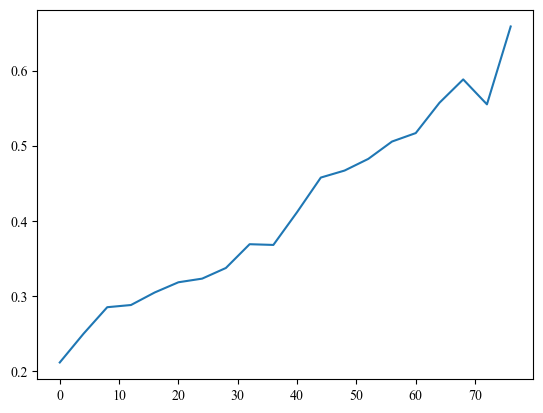

In [195]:
x = crystal_fraction.T[0]/25
y = crystal_fraction.T[1]
plt.plot(x,y)

In [197]:
file_name = os.path.join(root,'1800K_fraction.txt')
np.savetxt(file_name, np.array([x,y]).T, delimiter=",", fmt="%.6f")

# 计算n

In [151]:
x = np.array(x)
y = np.array(y)

In [161]:
len(x)

17

# 在之后就是各种画图了